## Decision Tree 
### Our objective is - Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [172]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

### Data exploration

In [105]:
df = pd.read_csv("G:\Github\DS-assignments-python\Decision Tree\Fraud_check.csv")

In [7]:
df.shape

(600, 6)

In [8]:
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [78]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int32 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int32(1), int64(2), object(3)
memory usage: 25.9+ KB


In [9]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [88]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [15]:
#axis{0 or ‘index’, 1 or ‘columns’}, default 0
#Axis along which the function is applied:

#0 or ‘index’: apply function to each column.

#1 or ‘columns’: apply function to each row.

In [32]:
#df[df['Taxable.Income'] <= 30000]['Taxable.Income'] = 0
#df[df['Taxable.Income'] > 30000]['Taxable.Income'] = 1
#the above approch doesn't work...cause deson;t repace any values

In [70]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [67]:
'''one way to do it shown below...
for i in list(df.index):
    if df.iloc[i,2]<30000:
        df.iloc[i,2] = 0
    else:
        df.iloc[i,2] = 1
'''

In [72]:
# best one liners in coding to map dual values baby --
df["Taxable.Income"] = pd.Series(np.where(df["Taxable.Income"]<=30000,0,1),df.index)

### lil bit of data visualization

##### watching for - Histogram ,outliers,CORR between columns,Collumn importance Value via ......   , category column dietribution and trends


In [166]:
# collecting numerical data in a different list
num_col = [f for f in list(df.columns) if df[f].dtype != "O" ]
obj_col = [f for f in list(df.columns) if df[f].dtype == "O" ]

In [167]:
obj_col

['Undergrad', 'Marital.Status', 'Urban']

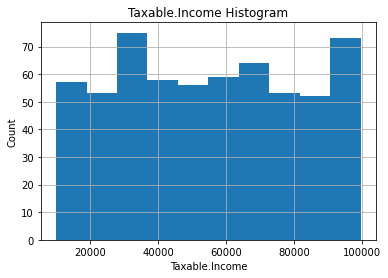

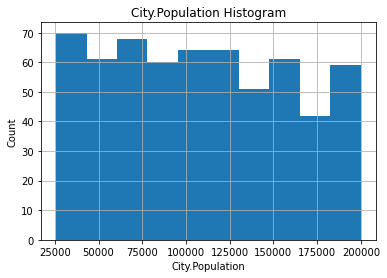

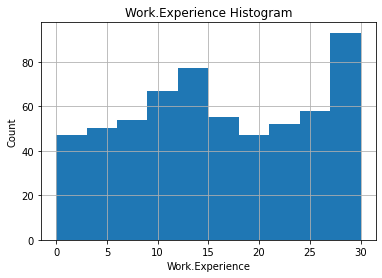

In [156]:
for i in num_col:
    df[i].hist()
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i+" Histogram")
    plt.show()

##### hitogram look good ....not any collumn with highly skewed values

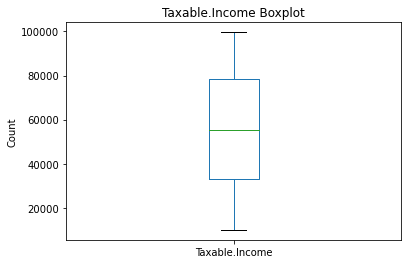

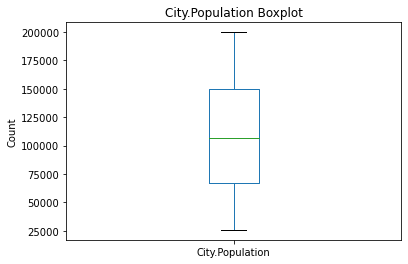

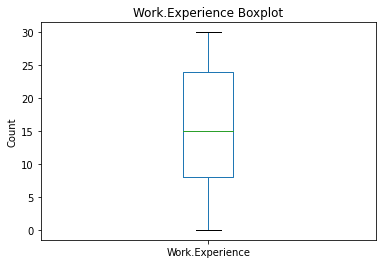

In [160]:
for i in num_col:
    df[i].plot.box()
    plt.ylabel("Count")
    plt.title(i+" Boxplot")
    plt.show()

#### no outliers 

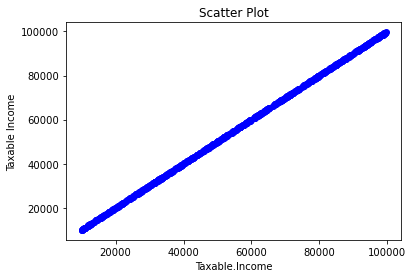

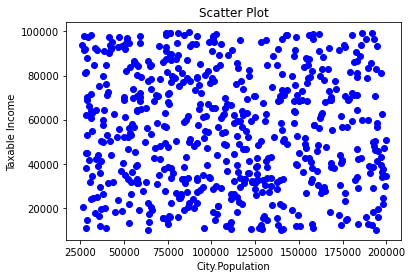

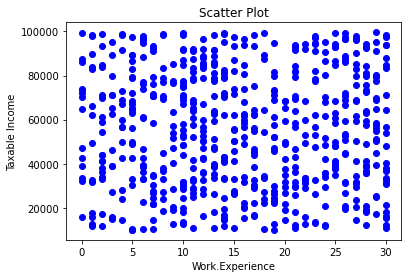

In [178]:
for i in num_col:
    plt.plot(df[i],df["Taxable.Income"],"bo")
    plt.xlabel(i)
    plt.ylabel("Taxable Income")
    plt.title("Scatter Plot")
    plt.show()

##### to see whether any numerical collumn as significant coreelation

<AxesSubplot:>

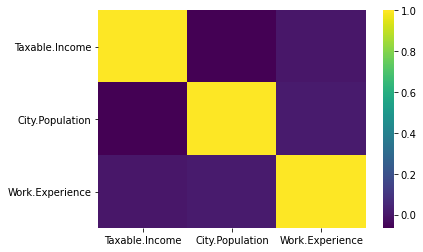

In [176]:
corrs = df.corr()
plt.figure()
sns.heatmap(corrs,xticklabels='auto',yticklabels='auto',cbar=True,cmap="viridis")

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


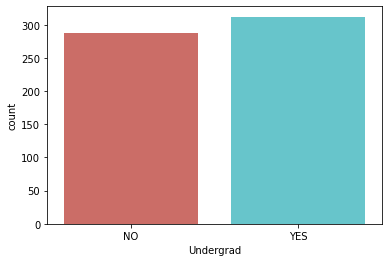

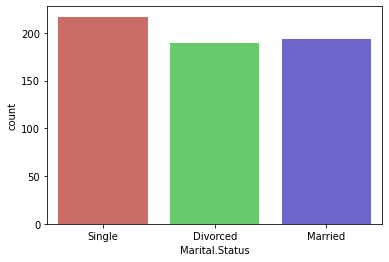

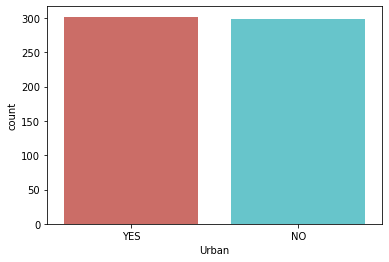

In [174]:
for i in obj_col:
    plt.figure()
    sns.countplot(i, data=df, palette='hls')

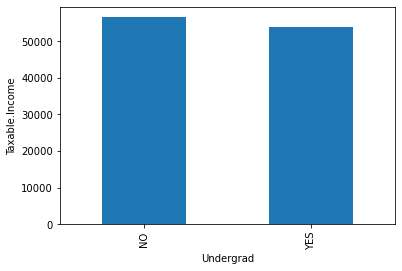

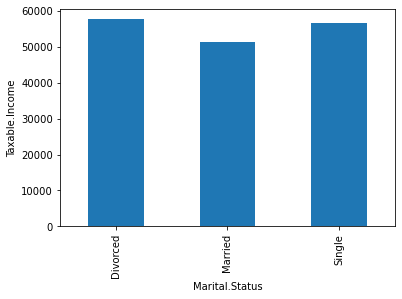

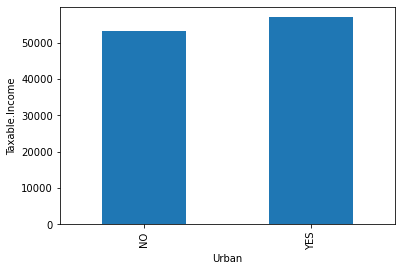

In [179]:
for i in obj_col:
    plt.figure()
    df.groupby(i)['Taxable.Income'].mean().plot.bar(); plt.xlabel(i); plt.ylabel('Taxable.Income')

#### in terms of categories....the data seems to be balanced
#### taxable income doesn't show any sway toeards a particular category...which i thought would be different for undergrad...but it is what it is

### Creating dummy variables and final dataset for decision tree algo

In [79]:
dum_m = pd.get_dummies(df,columns = ['Undergrad', 'Marital.Status','Urban'],drop_first = True)

In [80]:
dum_m

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,1,50047,10,0,0,1,1
1,1,134075,18,1,0,0,1
2,1,160205,30,0,1,0,1
3,1,193264,15,1,0,1,1
4,1,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,1,39492,7,1,0,0,1
596,1,55369,2,1,0,0,1
597,1,154058,0,0,0,0,1
598,1,180083,17,1,1,0,0


In [97]:
#creating test and train data
tr_df,ts_df = train_test_split(dum_m,test_size = 0.3,random_state= 13)

In [99]:
tr_df_y = tr_df.iloc[:,0]
tr_df_x = tr_df.iloc[:,1:]
ts_df_y = ts_df.iloc[:,0]
ts_df_x = ts_df.iloc[:,1:]

In [101]:
tr_df_x.shape

(420, 6)

### Decision tree model prediction and improvisation

In [180]:
mark1 = DecisionTreeClassifier(criterion = "entropy") 

In [181]:
mark1.fit(tr_df_x,tr_df_y)

DecisionTreeClassifier(criterion='entropy')

In [184]:
#Prediction on training set
pred_tr = mark1.predict(tr_df_x)

In [185]:
#predicting on test data
pred_ts = mark1.predict(ts_df_x)



In [186]:
#checking the crosstable
pd.crosstab(tr_df_y,pred_tr)



col_0,0,1
Taxable.Income,,
0,93,0
1,0,327


In [187]:
## finding the accuracy
# Train accuracy - 
np.mean(pred_tr == tr_df_y)
# 100%


1.0

In [188]:
#test accuracy
np.mean(pred_ts == ts_df_y)
# 75%


0.6777777777777778

In [189]:
pd.crosstab(ts_df_y,pred_ts)

col_0,0,1
Taxable.Income,,
0,11,20
1,38,111


#### The model seem sto be overfitting so prunning is required
##### the fun begins...

In [ ]:
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)[source]